In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [83]:
# read in csv as dataframe
county_df = pd.read_csv('https://mydataclassdb-bucket.s3.amazonaws.com/covid_and_politics_db.csv')
county_df.head()

,county,state,county_state,lat,long,totalpop,total_votes20,votes20_donald_trump,votes20_joe_biden,percentage20_donald_trump,...,age_55to64,age_65to74,age_75to84,age_84plus,evangelicals,protestant,catholic,orthodox,muslim,other
0,Kay,OK,"Kay, OK",36.817997,-97.144214,45173,17249,12834,4040,0.744,...,5694,4632,2724,1183,0,0,0,0,0,0
1,Abbeville,SC,"Abbeville, SC",34.223334,-82.461707,24788,12433,8215,4101,0.661,...,3584,3150,1602,591,0,0,0,0,0,0
2,Acadia,LA,"Acadia, LA",30.295065,-92.414197,62607,28425,22596,5443,0.795,...,0,0,0,0,0,0,0,0,0,0
3,Accomack,VA,"Accomack, VA",37.767072,-75.632346,32840,16938,9172,7578,0.542,...,5270,4451,2301,886,0,0,0,0,0,0
4,Ada,ID,"Ada, ID",43.452658,-116.241552,435117,259389,130699,120539,0.504,...,56615,42027,18576,7189,0,0,0,0,0,0


In [84]:
county_df.corr()

,lat,long,totalpop,total_votes20,votes20_donald_trump,votes20_joe_biden,percentage20_donald_trump,percentage20_joe_biden,cases,deaths,...,age_55to64,age_65to74,age_75to84,age_84plus,evangelicals,protestant,catholic,orthodox,muslim,other
lat,1.000000,-0.177464,-0.057355,-0.059981,-0.091792,-0.040639,-0.053569,0.031574,-0.095016,-0.044770,...,-0.035689,-0.048057,-0.056516,-0.032832,0.003415,0.003415,0.003415,0.003415,0.003415,0.003415
long,-0.177464,1.000000,-0.012772,-0.025421,0.005805,-0.039596,-0.065125,0.083961,0.000952,0.084303,...,0.056645,0.053385,0.064327,0.070257,-0.043250,-0.043250,-0.043250,-0.043250,-0.043250,-0.043250
totalpop,-0.057355,-0.012772,1.000000,0.974928,0.908159,0.969847,-0.366317,0.368234,0.950446,0.810714,...,0.763250,0.754397,0.742648,0.736570,-0.002631,-0.002631,-0.002631,-0.002631,-0.002631,-0.002631
total_votes20,-0.059981,-0.025421,0.974928,1.000000,0.949801,0.984181,-0.366340,0.368070,0.915932,0.729627,...,0.761316,0.758358,0.745710,0.734712,-0.002259,-0.002259,-0.002259,-0.002259,-0.002259,-0.002259
votes20_donald_trump,-0.091792,0.005805,0.908159,0.949801,1.000000,0.879413,-0.322464,0.323757,0.867620,0.658540,...,0.794541,0.800592,0.794796,0.766255,-0.002365,-0.002365,-0.002365,-0.002365,-0.002365,-0.002365
votes20_joe_biden,-0.040639,-0.039596,0.969847,0.984181,0.879413,1.000000,-0.374922,0.376968,0.903994,0.740317,...,0.711009,0.703112,0.687370,0.686914,-0.002168,-0.002168,-0.002168,-0.002168,-0.002168,-0.002168
percentage20_donald_trump,-0.053569,-0.065125,-0.366317,-0.366340,-0.322464,-0.374922,1.000000,-0.998743,-0.313468,-0.302485,...,-0.368393,-0.367175,-0.350463,-0.359337,-0.013355,-0.013355,-0.013355,-0.013355,-0.013355,-0.013355
percentage20_joe_biden,0.031574,0.083961,0.368234,0.368070,0.323757,0.376968,-0.998743,1.000000,0.316188,0.307715,...,0.371027,0.370036,0.353780,0.362616,0.011970,0.011970,0.011970,0.011970,0.011970,0.011970
cases,-0.095016,0.000952,0.950446,0.915932,0.867620,0.903994,-0.313468,0.316188,1.000000,0.821005,...,0.749901,0.740958,0.736918,0.723481,-0.003529,-0.003529,-0.003529,-0.003529,-0.003529,-0.003529
deaths,-0.044770,0.084303,0.810714,0.729627,0.658540,0.740317,-0.302485,0.307715,0.821005,1.000000,...,0.699103,0.691691,0.699393,0.715863,-0.003375,-0.003375,-0.003375,-0.003375,-0.003375,-0.003375


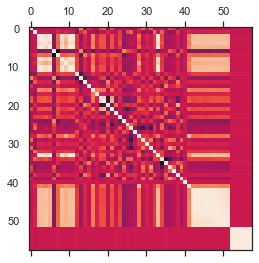

In [85]:
plt.matshow(county_df.corr())
plt.show()

<AxesSubplot:>

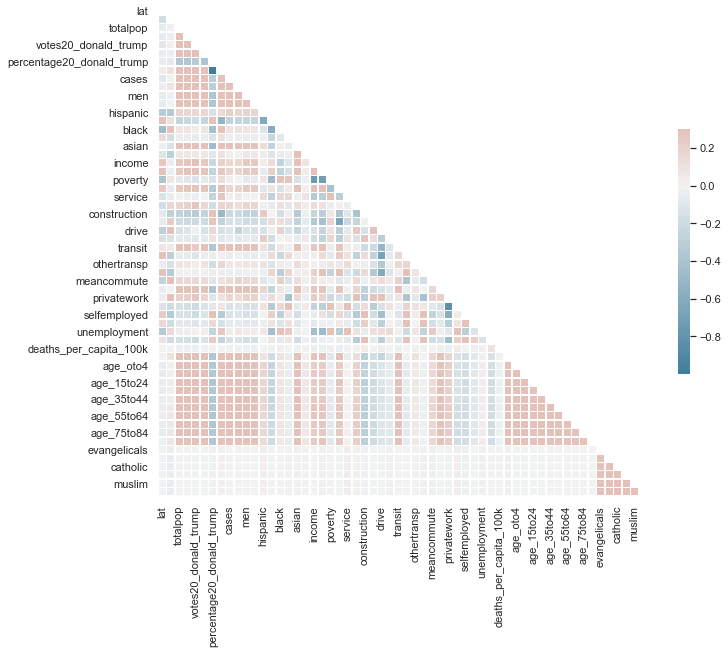

In [86]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = county_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [87]:
X = county_df['votes20_donald_trump'].values.reshape(-1,1)
X[:5]

array([[ 12834],
       [  8215],
       [ 22596],
       [  9172],
       [130699]])

In [88]:
y = county_df.cases
y.head()

0      920
1      805
2     3182
3     1227
4    17451
Name: cases, dtype: int64

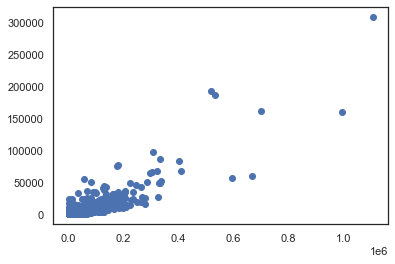

In [89]:
plt.scatter(X,y)
plt.show()

In [73]:
# split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [74]:
#model = LinearRegression()

In [90]:
#my_thing = model.fit(X_train,y_train)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  cases   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              9681.
Date:                Thu, 11 Mar 2021   Prob (F-statistic):                        0.00
Time:                        20:22:04   Log-Likelihood:                         -30563.
No. Observations:                3048   AIC:                                  6.113e+04
Df Residuals:                    3047   BIC:                                  6.113e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
X.shape

(3048, 1)

In [80]:
y_pred = my_thing.predict(X)
print(y_pred.shape)

(3048,)


In [81]:
print(my_thing.classification_report(y,y_pred))

AttributeError: 'LinearRegression' object has no attribute 'classification_report'

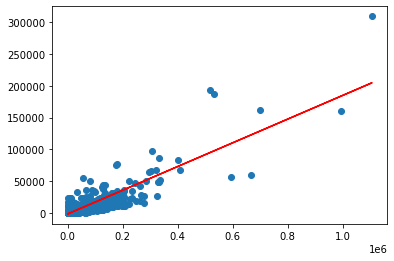

In [24]:
# plot predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [29]:
print(model.coef_)
print(model.intercept_)
print(model.score(X,y))
print('R Squared:', metrics.r2_score(y,y_pred))

[0.18606201]
-1266.1843496229171
0.7514489599276564
R Squared: 0.7514489599276564


In [30]:
X2 = county_df['votes20_joe_biden'].values.reshape(-1,1)
X2[:5]

array([[  4040],
       [  4101],
       [  5443],
       [  7578],
       [120539]])

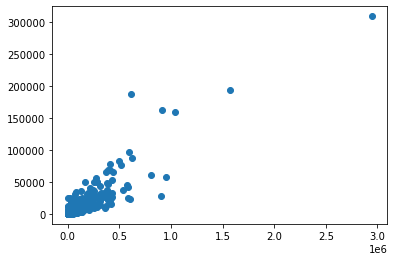

In [31]:
plt.scatter(X2,y)
plt.show()

In [32]:
# split data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, random_state=42)

In [33]:
model2 = LinearRegression()

In [34]:
model2.fit(X_train2,y_train2)

LinearRegression()

In [35]:
y_pred2 = model.predict(X2)
print(y_pred2.shape)

(3048,)


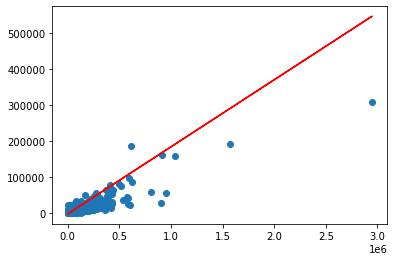

In [36]:
# plot predictions
plt.scatter(X2, y)
plt.plot(X2, y_pred2, color='red')
plt.show()

In [38]:
print(model2.coef_)
print(model2.intercept_)
print(model2.score(X2,y))
print('R Squared:', metrics.r2_score(y,y_pred2))

[0.10687457]
384.9226634557717
0.8171550535206967
R Squared: 0.3514722282584576


In [40]:
X3 = county_df['employed'].values.reshape(-1,1)
X3[:5]

array([[ 19325],
       [  9505],
       [ 24982],
       [ 13837],
       [214984]])

In [41]:
# split data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, random_state=42)

In [42]:
model3 = LinearRegression()

In [43]:
model3.fit(X_train3,y_train3)

LinearRegression()

In [44]:
y_pred3 = model3.predict(X3)

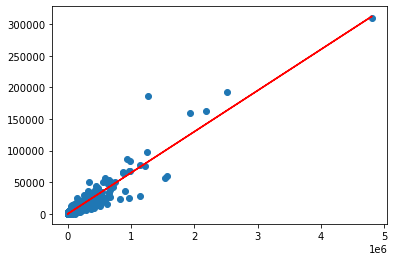

In [45]:
# plot predictions
plt.scatter(X3, y)
plt.plot(X3, y_pred3, color='red')
plt.show()

In [47]:
print(model3.coef_)
print(model3.intercept_)
print(model3.score(X3,y))
print('R Squared:', metrics.r2_score(y,y_pred3))

[0.06505093]
-196.454993856893
0.8914996820798334
R Squared: 0.8914996820798334


In [48]:
X4 = county_df['unemployment'].values.reshape(-1,1)
X4[:5]

array([[6.9],
       [9.4],
       [8.9],
       [5.4],
       [4.3]])

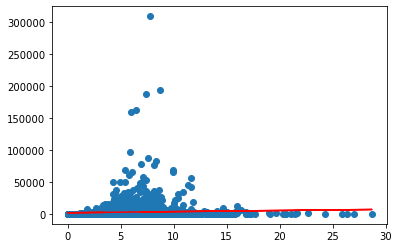

In [49]:
# split data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, random_state=42)

model4 = LinearRegression()

model4.fit(X_train4,y_train4)

y_pred4 = model4.predict(X4)

# plot predictions
plt.scatter(X4, y)
plt.plot(X4, y_pred4, color='red')
plt.show()

In [50]:
print(model4.coef_)
print(model4.intercept_)
print(model4.score(X4,y))
print('R Squared:', metrics.r2_score(y,y_pred4))

[178.27479447]
1796.1577902754789
0.0014879969854426633
R Squared: 0.0014879969854426633


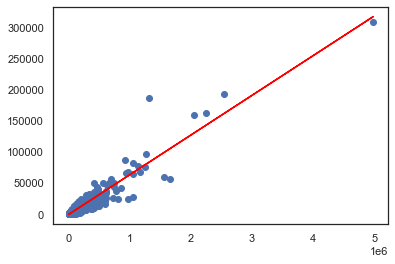

[0.06381993]
-303.6275488603069
0.9015791359437191
R Squared: 0.9015791359437191


In [62]:
X5 = county_df['men'].values.reshape(-1,1)
# split data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, random_state=42)

model5 = LinearRegression()

model5.fit(X_train5,y_train5)

y_pred5 = model5.predict(X5)

# plot predictions
plt.scatter(X5, y)
plt.plot(X5, y_pred5, color='red')
plt.show()

print(model5.coef_)
print(model5.intercept_)
print(model5.score(X5,y))
print('R Squared:', metrics.r2_score(y,y_pred5))

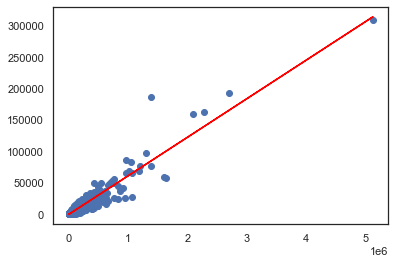

[0.0614742]
-285.9693895883065
0.9044744153615104
R Squared: 0.9044744153615104


In [63]:
X6 = county_df['women'].values.reshape(-1,1)

# split data into training and testing sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y, random_state=42)

model6 = LinearRegression()

model6.fit(X_train6,y_train6)

y_pred6 = model6.predict(X6)

# plot predictions
plt.scatter(X6, y)
plt.plot(X6, y_pred6, color='red')
plt.show()

print(model6.coef_)
print(model6.intercept_)
print(model6.score(X6,y))
print('R Squared:', metrics.r2_score(y,y_pred6))